# Семинар по OpenCV | Домашнее задание 5

**Задачи:**

1. Исправьте код применения оператора Собеля таким образом, чтобы оператор применялся по обоим направлениям (x и y).

2. Cоздать оконное приложение, отображающее результат применения того или иного фильтра (любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение).

3. К изображению `hong.png` необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом.

**Данные:** изображения `../data/sudoku.jpg`, `../data/hong.png`.

---

Импорт библиотек:

In [1]:
import numpy as np
import cv2 as cv

import os
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt

Игнорирование предупреждений:

In [2]:
import warnings

warnings.simplefilter('ignore')

Задание пути до папки с изображениями:

In [3]:
PATH = '../data/'

Задание функции, возвращающей получаемое по переданному пути изображение в формате RGB:

In [4]:
def plot_image(path: str, img_name: str, return_img: bool = True) -> np.ndarray:
    img = os.path.join(path, img_name)

    img = cv.imread(img, 0)
    
    plt.imshow(img, cmap='gray')
    plt.show()
    
    if return_img:
        return img

Задание функции, выводящей изображение до и после преобразования:

In [5]:
def plot_image_before_after(img_before: np.ndarray, 
                            img_after: np.ndarray,
                            titles: List[str] = ['Init', 'Transformed'],
                            share_x: bool = True,
                            share_y: bool = True) -> None:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=share_x, sharey=share_y, figsize=(12, 6))
    title_before, title_after = titles
    
    ax1.imshow(img_before, cmap='gray')
    ax1.set_title(title_before)
    
    if share_x is False:
        ax1.set_xticks([])
        ax1.set_yticks([])
    
    ax2.imshow(img_after, cmap='gray')
    ax2.set_title(title_after)
    
    if share_x is False:
        ax2.set_xticks([])
        ax2.set_yticks([])
    
    if share_x:
        plt.xticks([])
        plt.yticks([])

    plt.show()

---

>**Задание 1**
>
>Исправить код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).

Выведение на экран изображения:

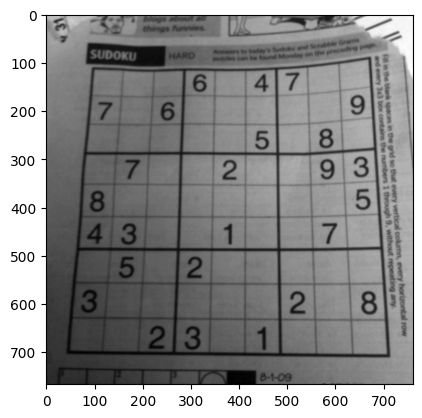

In [6]:
image_sudoku = plot_image(PATH, 'sudoku.png')

In [7]:
def transform_sobel(img: np.ndarray) -> np.ndarray:
    
    sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
    sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
    
    return sobel_x + sobel_y

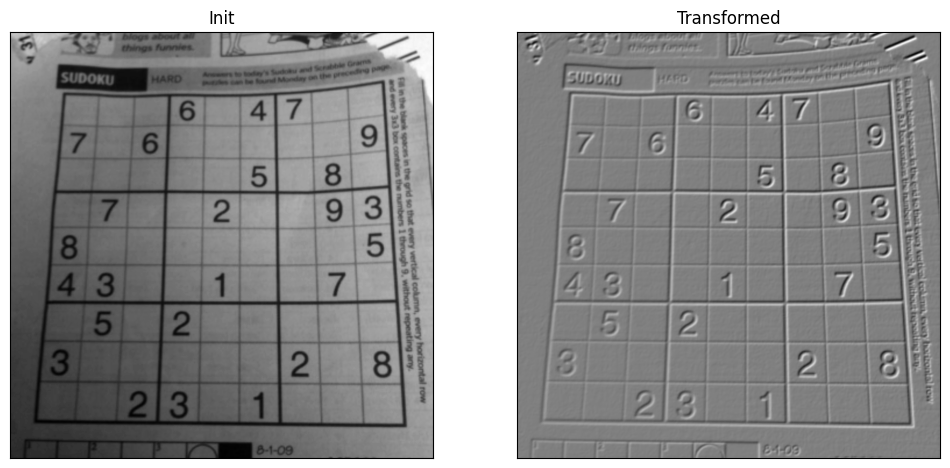

In [8]:
plot_image_before_after(
    image_sudoku,
    transform_sobel(image_sudoku)
)

---

>**Задание 2**
>
>На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно. 
>
>Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение). 
>
>*Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html*

Задание функции, определяющей типы трансформаций:

In [9]:
def on_change_transform(img: np.ndarray, val: int) -> None:
    
    transform_switcher = {
        0: {'blur': {'kernel_size': 1}},
        1: {'canny': {'threshold1': 0, 'threshold2': 0}}
    }
    
    update_image(img, transform_switcher[val])

Задание функции, обновляющей отображаемое изображение:

In [10]:
def update_image(img: np.ndarray, switcher: Dict[str, Dict[str, int]]) -> None:
    
    name, params = *switcher.keys(), *switcher.values()
    
    img_transform = apply_transform(img.copy(), name, **params)
    
    color = (0, 0, 0) if name == 'blur' else (255, 255, 255)
    
    add_text(img_transform, name, color)
    
    cv.imshow('image transform', img_transform)

Задание функции, отображающей текст на изображении:

In [11]:
def add_text(img: np.ndarray, text: str, color: Tuple[int] = (0, 0, 0), shift: int = 0):
    
    cv.putText(
        img, 
        text=text, 
        org=(50, 50 + shift), 
        fontFace=cv.FONT_HERSHEY_SIMPLEX, 
        fontScale=1, 
        color=color, 
        thickness=2
    )

Задание функции, применяющей трансформации к изображению:

In [12]:
def apply_transform(img: np.ndarray, name: str, **kwargs) -> np.ndarray:
    
    if name == 'canny':
        threshold1 = kwargs['threshold1']
        threshold2 = kwargs['threshold2']
        
        return cv.Canny(img, threshold1, threshold2)
        
    if name == 'blur':
        kernel_size = kwargs['kernel_size']
        
        kernel_size = 1 if kernel_size == 0 else kernel_size
        
        return cv.blur(img, (kernel_size, kernel_size))
    
    return img

Задание наименований ползунков:

In [13]:
slider_name_1 = 'Canny 1'
slider_name_2 = 'Canny 2'
slider_name_3 = 'Blur k'

Задание функции, считывающей значения ползунков для задания параметров трансформации Canny:

In [14]:
def on_change_canny_parameter(img: np.ndarray, window_name: str, threshold_1: int) -> None: 
    
    threshold_1 = cv.getTrackbarPos(slider_name_1, window_name)
    threshold_2 = cv.getTrackbarPos(slider_name_2, window_name)
    
    update_image(img, {'canny': {'threshold1': threshold_1, 'threshold2': threshold_2}}) 

Задание функции, считывающей значения ползунков для задания параметров трансформации Blur:

In [15]:
def on_change_blur_parameter(img: np.ndarray, window_name: str, val: int) -> None: 
    
    kernel_size = cv.getTrackbarPos(slider_name_3, window_name)
    
    update_image(img, {'blur': {'kernel_size': kernel_size}}) 

Вызов окна с фильтрами для изображения:

In [16]:
img = cv.imread(os.path.join(PATH, 'hong.png'))
width, height = img.shape[:2]

window_name = 'image transform'


# resize window
cv.namedWindow(window_name, cv.WINDOW_NORMAL) 
cv.resizeWindow(window_name, width // 2, round(height / 1.5))


# make image smaller
img = cv.resize(img, None, fx=0.4, fy=0.4)


# calculate the size difference between small and initial image
padding_top_bottom = 20
padding_left_right = (width - width // 2) // 2


# add borders to image to make it smaller while saving the window size
img = cv.copyMakeBorder(
    img, 
    top=padding_top_bottom, 
    bottom=padding_top_bottom, 
    left=padding_left_right, 
    right=padding_left_right, 
    borderType=cv.BORDER_CONSTANT, 
    dst=None, 
    value=(255, 255, 255)
)

 
cv.imshow(window_name, img)

transform_type = cv.createTrackbar('Transform', window_name, 0, 1, lambda x: on_change_transform(img, x))

cv.createTrackbar(slider_name_1, window_name, 0, 500, lambda x: on_change_canny_parameter(img, window_name, x))
cv.createTrackbar(slider_name_2, window_name, 0, 500, lambda x: on_change_canny_parameter(img, window_name, x))
cv.createTrackbar(slider_name_3, window_name, 0, 255, lambda x: on_change_blur_parameter(img, window_name, x))


cv.waitKey(0) 
cv.destroyAllWindows()

---

>**Задание 3**
>
>К изображению `hong.png` из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом.

Выведение на экран изображения:

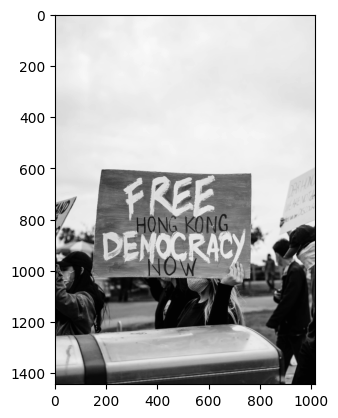

In [17]:
image_hong = plot_image(PATH, 'hong.png')

Выведение на экран образа результата:

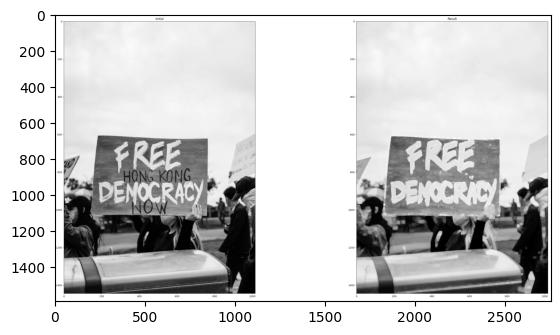

In [18]:
plot_image(PATH, 'hong_res.png', return_img=False)

---

Задание функции, выводящей несколько изображений:

In [19]:
def plot_multi_images(imgs: List[Tuple[str, np.ndarray]]) -> None:
    n_cols = 3
    n_rows = len(imgs) // n_cols 
    
    n_rows = n_rows if len(imgs) % n_cols == 0 else n_rows + 1
    
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
    
    i, j = 0, 0
    
    for (name, img), axis in zip(imgs, ax.flatten()):
        axis.imshow(img, cmap='gray')
        axis.set_title(name)
        
        j += 1
        
        if j == n_cols:
            i += 1
            j = 0
    
    while (j != n_cols):
        plt.delaxes(ax[i, j])
        j += 1
    
    plt.show()

Задание функции, применяющей различные морфологические операции к изображению:

In [20]:
def transfer_morphology(img: np.ndarray, kernel = np.ndarray) -> List[Tuple[str, np.ndarray]]:
    
    erosion = cv.erode(img, kernel, iterations=1)
    dilation = cv.dilate(img, kernel, iterations=1)
    opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
    gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
    top_hat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
    black_hat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
    
    morphologies = [
        ('erosion', erosion),
        ('dilation', dilation),
        ('opening', opening),
        ('closing', closing),
        ('gradient', gradient),
        ('top_hat', top_hat),
        ('black_hat', black_hat)
    ]
    
    return morphologies

---

Задание ядра:

In [21]:
kernel = np.ones((8, 8), np.uint8)

Выведение на экран результатов применения различных морфологических операций к изображению:

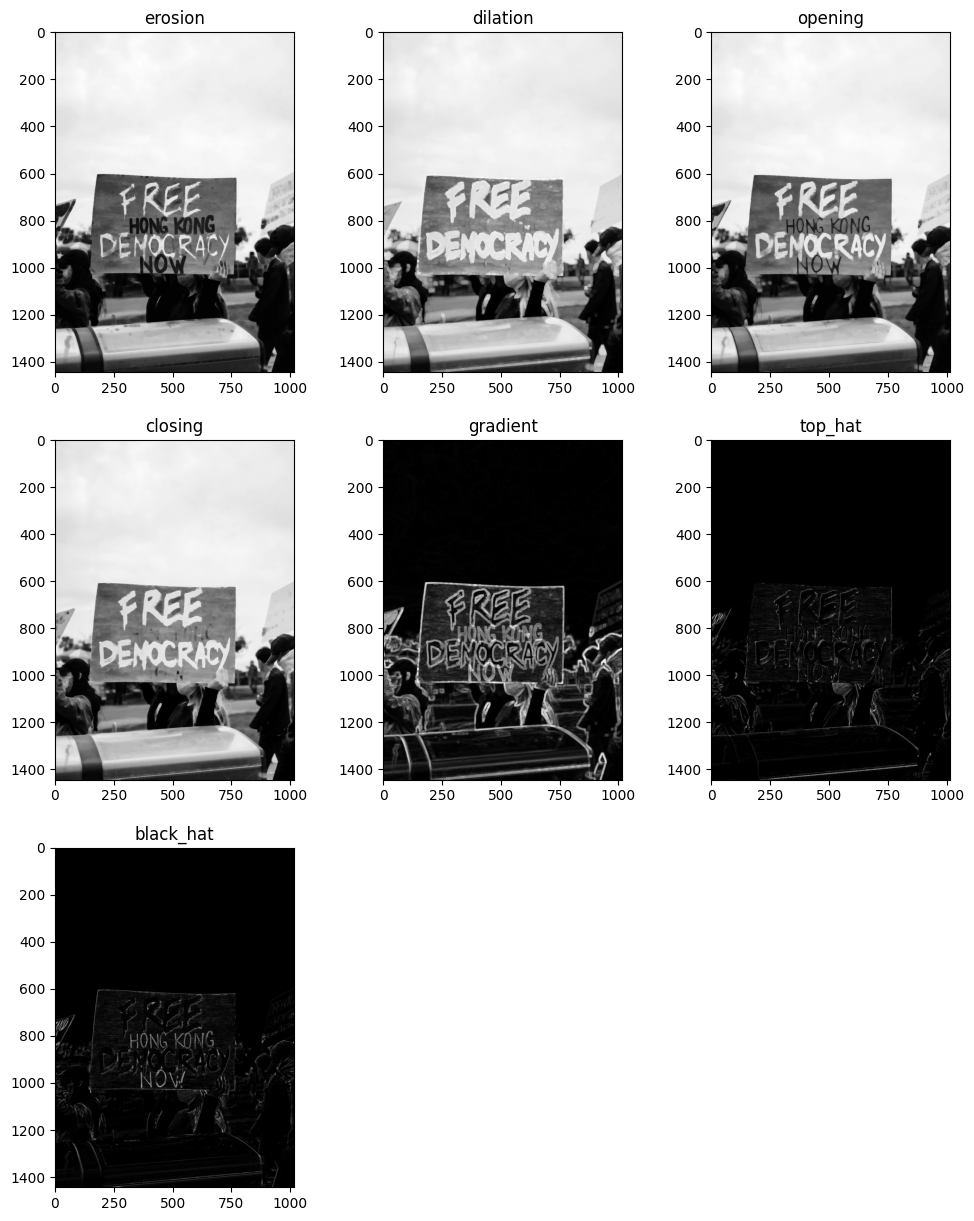

In [22]:
plot_multi_images(
    transfer_morphology(
        image_hong, kernel
    )
)

>* Поставленную задачу решает операция `dilation`.

Выведение на экранисходного изображения до и после преобразований:

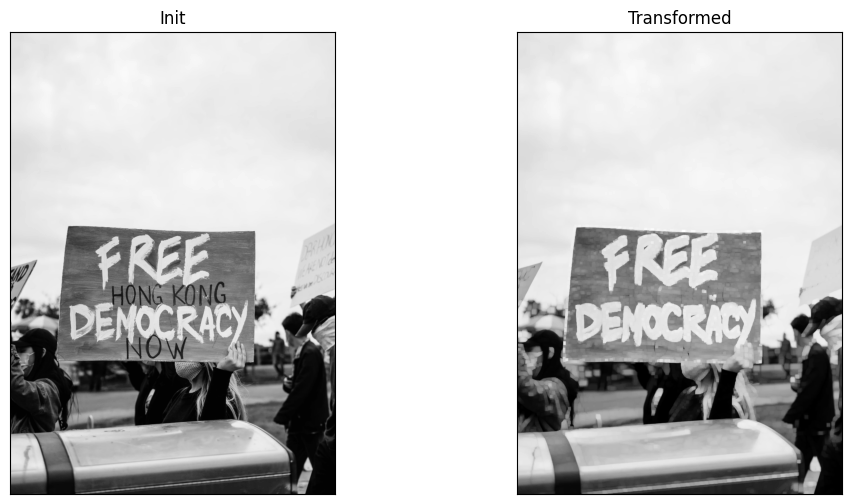

In [23]:
plot_image_before_after(
    image_hong,
    cv.dilate(image_hong, kernel, iterations = 1)
)

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Семинар-по-OpenCV-|-Домашнее-задание-5" data-toc-modified-id="Наверх" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        Наверх ↑
    </a>
</div>